# Pymaceuticals Inc.
---

### Analysis

-- The results of this study show us that Capomulin has successful results when it comes to treating SCC tumors.

-- According to the statistics, mice treated with Capomulin consistently had the second lowest tumor volume. While the numbers were only slightly higher than Ramicane, they were noticeably lower than the other eight drugs that were used in the study.

-- When narrowing the results down to Capolmulin, Ramicane, Infubinol and Ceftamin, we can see from the data and box plot that the tumor volume was significantly lower in Capolmulin and Ramicane with no outliers.

-- By singling out Mouse l509, who was treated with Capolmulin, the line chart shows us that despite its tumor volume rising at first, it had dropped significantly as time went on, from a high of 48.07 to a low of 40.2. However, it is worth noting that by the end of the study it had begun to rise again.

-- By observing the scatterplot, we can see that there is a correlation between weight and tumor volume, as the higher a mouse’s weight is there is also an increase in tumors. Being that the correlation coefficient is above 0.8, we can conclude that this is a strong positive relationship.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(merged_df["Mouse ID"].nunique())

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated]
duplicate_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merged_df[(merged_df["Mouse ID"] == "g989")]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = merged_df[merged_df["Mouse ID"].str.contains("g989")==False]
clean_dataframe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
print(clean_dataframe["Mouse ID"].nunique())

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = clean_dataframe.groupby(clean_dataframe["Drug Regimen"])

tumor_mean = summary_statistics["Tumor Volume (mm3)"].mean()
tumor_median = summary_statistics["Tumor Volume (mm3)"].median()
tumor_variance = summary_statistics["Tumor Volume (mm3)"].var()
tumor_standard_deviation = summary_statistics["Tumor Volume (mm3)"].std()
tumor_sem = summary_statistics["Tumor Volume (mm3)"].sem()

summary_statistics_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                                     "Median Tumor Volume": tumor_median,
                                     "Tumor Volume Variance": tumor_variance,
                                     "Tumor Volume Std. Dev.": tumor_standard_deviation,
                                     "Tumor Volume Std. Er.": tumor_sem})

summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Er.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_df_agg = clean_dataframe[["Tumor Volume (mm3)", "Drug Regimen"]].groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])
summary_statistics_df_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

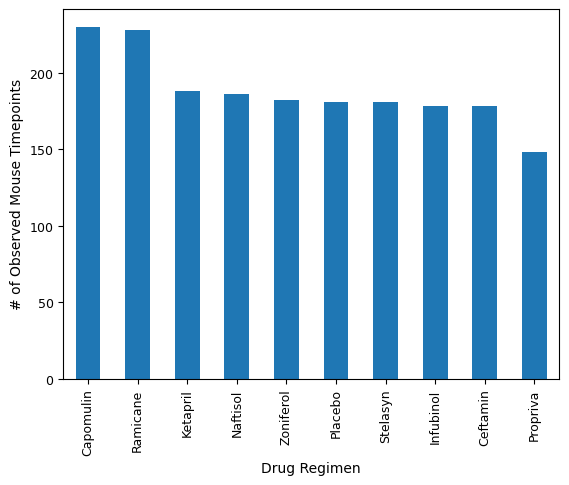

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot_data = clean_dataframe["Drug Regimen"].value_counts()
bar_plot_pandas = bar_plot_data.plot.bar(y = '# of Observed Mouse Timepoints', x = 'Drug Regimen', fontsize='9')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

bar_plot_pandas

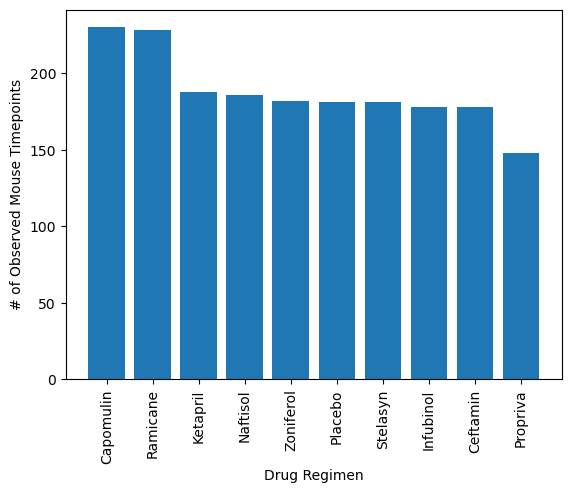

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = bar_plot_data.index.values
y_axis = bar_plot_data.values

plt.bar(x_axis,y_axis)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

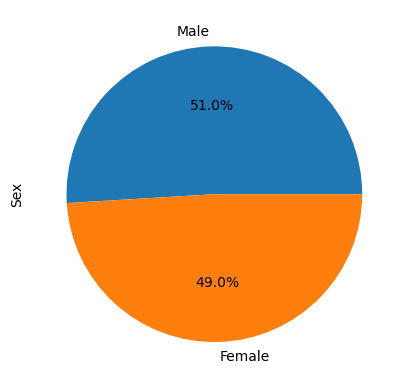

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

female_male_data = clean_dataframe["Sex"].value_counts()
female_male_data.plot.pie(autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

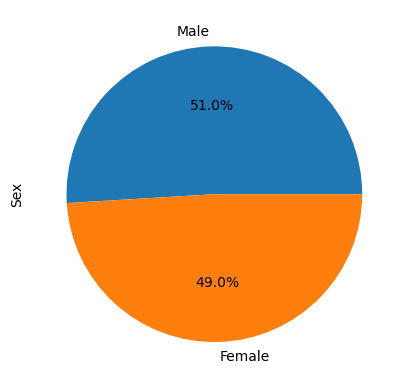

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
plt.pie(female_male_data, autopct="%1.1f%%", labels=labels)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = clean_dataframe.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint_merged = pd.merge(last_timepoint, clean_dataframe)
last_timepoint_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatments_capomulin = []
treatments_ramicane = []
treatments_infubinol = []
treatments_ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for mice, row in last_timepoint_merged.iterrows():
    if row ["Drug Regimen"] == "Capomulin":
        treatments_capomulin.append(row['Tumor Volume (mm3)'])
    if row ["Drug Regimen"] == "Ramicane":
        treatments_ramicane.append(row['Tumor Volume (mm3)'])
    if row ["Drug Regimen"] == "Infubinol":
        treatments_infubinol.append(row['Tumor Volume (mm3)'])
    if row ["Drug Regimen"] == "Ceftamin":
        treatments_ceftamin.append(row['Tumor Volume (mm3)'])
        
    # add subset 
treatment_df = pd.DataFrame ({"Capomulin": treatments_capomulin,
                             "Ramicane": treatments_ramicane,
                             "Infubinol": treatments_infubinol,
                             "Ceftamin": treatments_ceftamin})
    
    # Determine outliers using upper and lower bounds
treatment_df_max = treatment_df.max()
treatment_df_min = treatment_df.min()

treatment_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


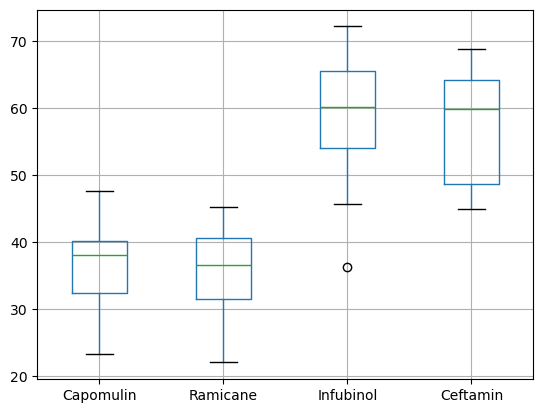

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_boxplot = treatment_df.boxplot(column=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

single_mouse = clean_dataframe[clean_dataframe["Mouse ID"].str.contains("l509")==True]
single_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


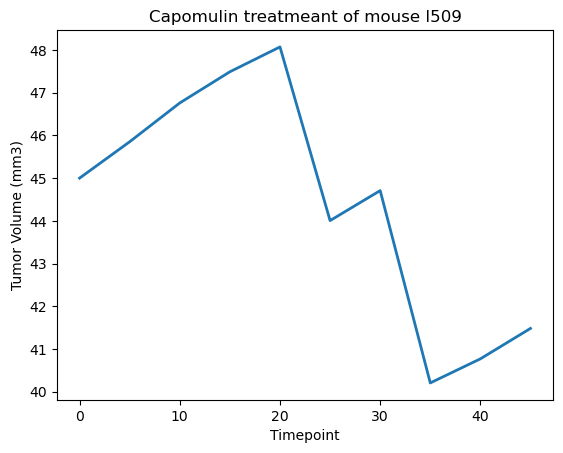

In [17]:
x_axis = single_mouse["Timepoint"]
y_axis = single_mouse ["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis,linewidth=2, markersize=12)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig('linechart')
plt.show()

In [18]:
Capomulin_regimen = clean_dataframe[clean_dataframe["Drug Regimen"].str.contains("Capomulin")==True]
Capomulin_regimen

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [19]:
Capomulin_tumor_avg = Capomulin_regimen.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean().reset_index()
Capomulin_weight_avg = Capomulin_regimen.groupby(["Mouse ID"])["Weight (g)"].mean().reset_index()

Capomulin_avg_df = pd.merge(Capomulin_tumor_avg, Capomulin_weight_avg)
Capomulin_avg_df

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22.0
1,b742,40.083699,21.0
2,f966,36.505973,17.0
3,g288,41.990097,19.0
4,g316,44.613344,22.0
5,i557,44.805810,24.0
6,i738,39.141053,20.0
7,j119,44.465236,23.0
8,j246,43.216925,21.0
9,l509,44.434474,21.0


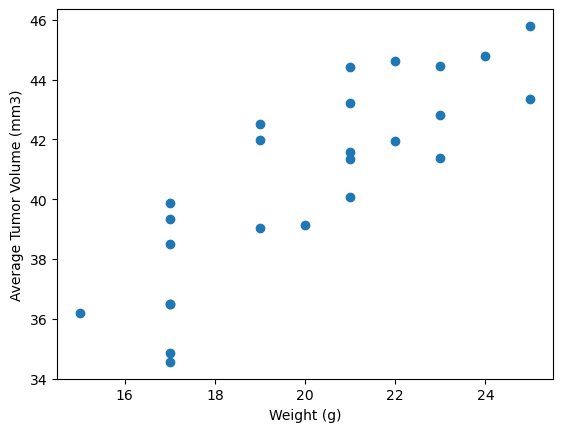

In [20]:
plt.scatter(Capomulin_avg_df["Weight (g)"], Capomulin_avg_df["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.7088568047708723


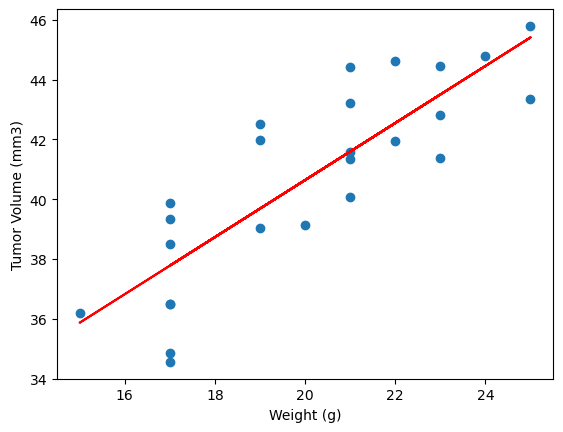

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

x_values = Capomulin_avg_df["Weight (g)"]
y_values = Capomulin_avg_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is: {rvalue**2}")
plt.show()